D:\Programme\Anaconda\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


journalArticle     311
conferencePaper    243
dtype: int64


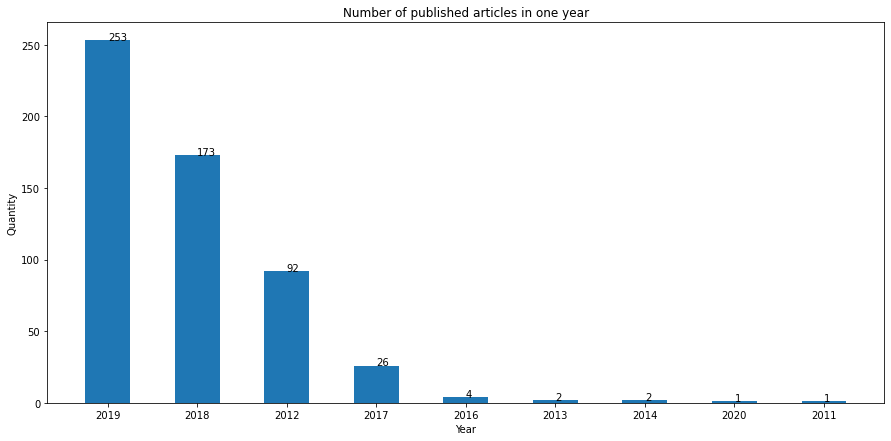

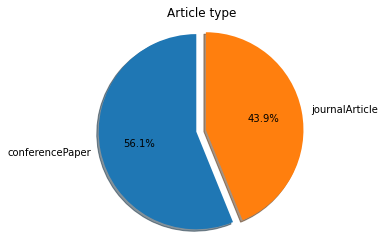

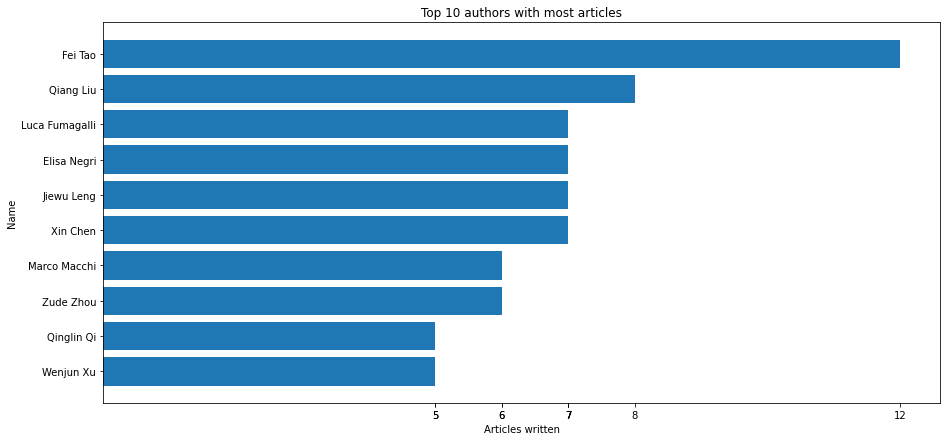

In [1]:
import jsonlines
import numpy as np
import sys
import pandas as pd
import json
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from pprint import pprint
import gensim.corpora as corpora
import gensim
from gensim.utils import simple_preprocess
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords


metadata = []
data = []
paper_text = []
year = []
type = []
authors = []
dir = "F:\\Coding\ML4B\Repository\ML4B\data\Digital_Twin_Scientific_Papers.jl"

with jsonlines.open(dir) as reader:
    for obj in reader:
        if obj['relevant'] == True:
            data.append(obj['metadata']['data'])
            metadata.append(obj['metadata_extract'])
            paper_text.append(obj['paper_text'])
            year.append(obj['metadata_extract']['year'])
            type.append(obj['metadata_extract']['item_type'])
            authors.append(obj['metadata_extract']['authors'])

name = []
for names in authors:
    for n in names:
        name.append(n['fullName'])

df_metadata = pd.DataFrame(metadata)
df_data = pd.DataFrame(data)
df_pText = pd.DataFrame(paper_text)
df_year = pd.DataFrame(year)
df_type = pd.DataFrame(type)
df_name = pd.DataFrame(name)
print(df_type.value_counts())
papers = pd.concat([df_year, df_metadata.title, df_metadata.abstract, df_pText], axis=1 )


papers['title_processed'] = \
papers.iloc[:,1].map(lambda x: re.sub('[,\\.!?]', '', x))
papers['abstract_processed'] = \
papers.iloc[:,2].map(lambda x: re.sub('[,\\.!?]', '', x))
papers['text_processed'] = \
papers.iloc[:,3].map(lambda x: re.sub('[,\\.!?]', '', x))


papers['title_processed'] = \
papers.iloc[:,1].map(lambda x: x.lower())
papers['abstract_processed'] = \
papers.iloc[:,2].map(lambda x: x.lower())
papers['text_processed'] = \
papers.iloc[:,3].map(lambda x: x.lower())

bars= pd.Series(year).unique()
y_pos= df_year.value_counts()
x_pos = np.arange(len(bars))
plt.figure(figsize=(15,7))
plt.bar(x_pos, y_pos,  width=0.5)#color=('rgbkymc')[::-1],
plt.xticks(x_pos, bars)
plt.title("Number of published articles in one year")
plt.xlabel("Year")
plt.ylabel("Quantity")
for index, value in enumerate(y_pos):
    plt.text(index, value, str(value))

labels= pd.Series(type).unique()
sizes = df_type.value_counts()
explode = (0.0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,  autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Article type")



string_list = []
for i in df_name.value_counts()[0:10].index.tolist():
    string_list.append(str(i)[2:-3])


bars = pd.Series(string_list)
y_pos = np.arange(len(bars))
x_pos= df_name.value_counts()[0:10]
plt.figure(figsize=(15,7))
plt.barh(y_pos, x_pos,  )
plt.yticks(y_pos, bars)
plt.ylabel("Name")
plt.gca().invert_yaxis()
plt.xticks(x_pos)
plt.xlabel("Articles written")
plt.title("Top 10 authors with most articles")
#for index, value in enumerate(x_pos):
#    plt.text(index, value, str(value))
plt.show()

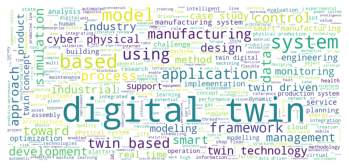

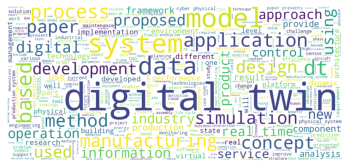

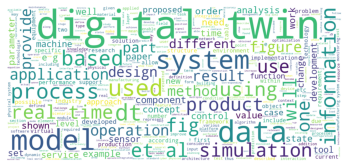

In [2]:
long_string_title = ','.join(list(papers['title_processed'].values))
long_string_abstract = ','.join(list(papers['abstract_processed'].values))
long_string_text = ','.join(list(papers['text_processed'].values))


wordcloud_title = WordCloud(width=1300, height= 600,background_color="white", contour_width=3, contour_color='steelblue', max_words=400)
wordcloud_abstract = WordCloud(width=1300, height= 600,background_color="white", contour_width=3, contour_color='steelblue', max_words=400)
wordcloud_text = WordCloud(width=1300, height= 600,background_color="white", contour_width=3, contour_color='steelblue', max_words=400)


wordcloud_title.generate(long_string_title)
wordcloud_abstract.generate(long_string_abstract)
wordcloud_text.generate(long_string_text)


plt.imshow(wordcloud_title.to_image())
wordcloud_title.to_file('wordcloud_title.png')
plt.axis("off")
plt.show()
plt.imshow(wordcloud_abstract.to_image())
wordcloud_abstract.to_file('wordcloud_abstract.png')
plt.axis("off")
plt.show()
plt.imshow(wordcloud_text.to_image())
wordcloud_text.to_file('wordcloud_text.png')
plt.axis("off")
plt.show()

In [3]:
import nltk

stop_words = stopwords.words('english')
stop_words.extend(['threee','well','based','twin','digital','from', 'subject', 're', 'edu', 'use', 'et', 'al', 'also', 'fig', 'used', 'dt', 'one', 'different', 'dt'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


title_data = papers.title_processed.values.tolist()
title_data_words = list(sent_to_words(title_data))

abstract_data = papers.abstract_processed.values.tolist()
abstract_data_words = list(sent_to_words(abstract_data))

text_data = papers.text_processed.values.tolist()
text_data_words = list(sent_to_words(text_data))

# remove stop words
title_data_words = remove_stopwords(title_data_words)
abstract_data_words = remove_stopwords(abstract_data_words)
text_data_words = remove_stopwords(text_data_words)

#print(title_data_words[:1][0][:30])
#print(abstract_data_words[:1][0][:30])
#print(text_data_words[:1][0][:30])
print(len(text_data_words))



# Create Dictionary
id2word1 = corpora.Dictionary(title_data_words)
id2word2 = corpora.Dictionary(abstract_data_words)
id2word3 = corpora.Dictionary(text_data_words)

# Create Corpus
texts1 = title_data_words
texts2 = abstract_data_words
texts3 = text_data_words

# Term Document Frequency
corpus1 = [id2word1.doc2bow(text) for text in texts1]
corpus2 = [id2word2.doc2bow(text) for text in texts2]
corpus3= [id2word3.doc2bow(text) for text in texts3]

# View
#print(corpus1[:1][0][:30])
#print(corpus2[:1][0][:30])
print(corpus3[:1][0][:30])





# number of topics
num_topics = 10

# Build LDA model
lda_model1 = gensim.models.LdaMulticore(corpus=corpus1, id2word=id2word1, num_topics=num_topics)
lda_model2 = gensim.models.LdaMulticore(corpus=corpus2, id2word=id2word2, num_topics=num_topics)
lda_model3 = gensim.models.LdaMulticore(corpus=corpus3, id2word=id2word3, num_topics=num_topics)



pprint(lda_model1.print_topics())
doc_lda = lda_model1[corpus1]

pprint(lda_model2.print_topics())
doc_lda = lda_model2[corpus2]

pprint(lda_model3.print_topics())
doc_lda = lda_model3[corpus3]



554
[(0, 2), (1, 6), (2, 1), (3, 1), (4, 1), (5, 1), (6, 4), (7, 2), (8, 2), (9, 3), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 3), (17, 1), (18, 3), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 2), (26, 1), (27, 2), (28, 4), (29, 1)]
[(0,
  '0.022*"framework" + 0.020*"manufacturing" + 0.019*"using" + 0.019*"systems" '
  '+ 0.014*"smart" + 0.014*"technology" + 0.012*"physical" + 0.012*"system" + '
  '0.011*"industrial" + 0.011*"control"'),
 (1,
  '0.032*"manufacturing" + 0.017*"systems" + 0.013*"simulation" + '
  '0.013*"model" + 0.013*"development" + 0.013*"towards" + 0.013*"framework" + '
  '0.011*"case" + 0.011*"control" + 0.009*"product"'),
 (2,
  '0.021*"data" + 0.018*"manufacturing" + 0.012*"modeling" + 0.011*"using" + '
  '0.009*"cloud" + 0.009*"computing" + 0.009*"systems" + 0.009*"industry" + '
  '0.009*"process" + 0.009*"towards"'),
 (3,
  '0.017*"model" + 0.015*"learning" + 0.015*"process" + 0.013*"planning" + '
  '0.013*"design" + 0.013*"machin

In [4]:
import gensim
import pickle
import pyLDAvis
import os
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

#vis1 = gensimvis.prepare(lda_model1, corpus1, id2word1)
#vis1
#vis2 = gensimvis.prepare(lda_model2, corpus2, id2word2)
#vis2
vis3 = gensimvis.prepare(lda_model3, corpus3, id2word3)
vis3
    
pyLDAvis.save_html(vis1, "topics_title_lda10.html")
pyLDAvis.save_json(vis1, "topics_title_lda10.json")
pyLDAvis.save_html(vis2, "topics_abstract_lda10.html")
pyLDAvis.save_json(vis2, "topics_abstract_lda10.json")
pyLDAvis.save_html(vis3, "topics_text_lda10.html")
pyLDAvis.save_json(vis3, "topics_text_lda10.json")
    



D:\Programme\Anaconda\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
